<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [4]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [6]:
img3_path = threes[1]
im3 = Image.open(img3_path)
im3

In [7]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [8]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
import pandas as pd

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)


(6265, 6131)

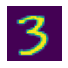

In [12]:
show_image(three_tensors[1]);

In [13]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [14]:
len(stacked_threes.shape)

3

In [15]:
stacked_threes.ndim

3

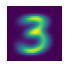

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

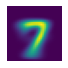

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

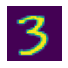

In [18]:
a_3 = stacked_threes[1]
show_image(a_3);

In [19]:
dist_3_abs = (a_3 - mean3).abs().mean() 
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [20]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [21]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [22]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/255
valid_7_tens.shape, valid_3_tens.shape

(torch.Size([1028, 28, 28]), torch.Size([1010, 28, 28]))

In [23]:
def mnist_distance(a, b): return (a-b).abs().mean((-2, -1))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [24]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1181, 0.1381, 0.1217,  ..., 0.1300, 0.1143, 0.1107]),
 torch.Size([1010]))

In [25]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [26]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [27]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [28]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [29]:
def f(x): return x**2

In [30]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, steps=20)
    #print("These are the stepped points", x)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

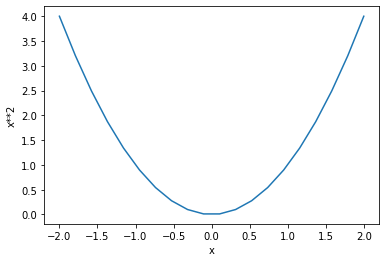

In [31]:
plot_function(f, 'x', 'x**2')

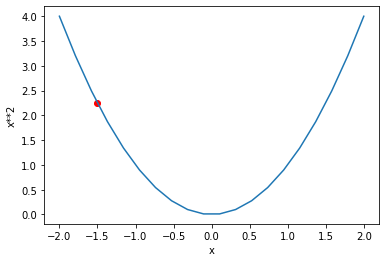

In [32]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [33]:
xt = tensor(3.).requires_grad_()

In [34]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [35]:
yt.backward()

In [36]:
xt.grad

tensor(6.)

In [37]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [38]:
def f(x): return (x**2).sum()

In [39]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [40]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [41]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

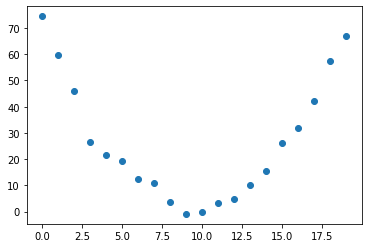

In [42]:
torch.manual_seed(42)
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [43]:
def f(t, params):
  a, b, c = params
  return a*(t**2) + (b*t) + c

In [44]:
def mse(preds, targets): return ((preds - targets)**2).mean()

In [45]:
params = torch.randn(3).requires_grad_()

In [46]:
preds = f(time, params)

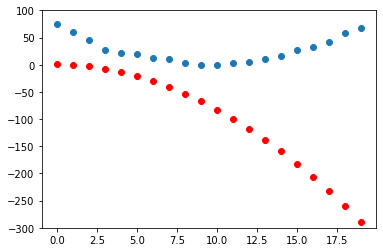

In [47]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

show_preds(preds)

In [48]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [49]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [50]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [51]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [52]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [53]:
preds = f(time, params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

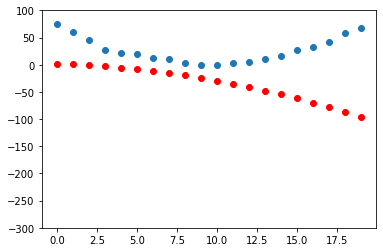

In [54]:
show_preds(preds)

In [55]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds


In [56]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


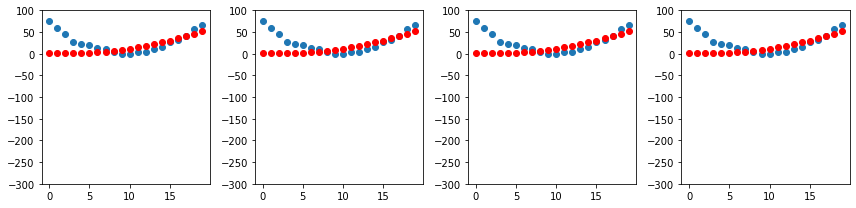

In [57]:
_, axs = plt.subplots(1, 4 ,figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [58]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [59]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [60]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [61]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [62]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28 ,1))

In [63]:
bias = init_params(1)

In [64]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [65]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [66]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [67]:
corrects.float().mean().item()

0.4912068545818329

In [68]:
with torch.no_grad():
  weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [69]:
trgts = tensor([1, 0, 1])
prds = tensor([0.9, 0.4, 0.2])

In [70]:
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [71]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [72]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [73]:
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.2333)

In [74]:
def sigmoid(x): return 1/(1+torch.exp(-x))

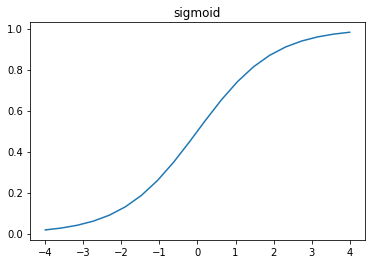

In [75]:
plot_function(torch.sigmoid, title='sigmoid', min=-4, max=4)

In [76]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [77]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 9,  5,  1, 13,  7]),
 tensor([12, 10, 11,  2,  8]),
 tensor([14,  4,  0,  6,  3])]

In [78]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [79]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([15, 13,  2, 17,  5, 21]), ('p', 'n', 'c', 'r', 'f', 'v')),
 (tensor([ 0,  8,  1, 12, 11,  4]), ('a', 'i', 'b', 'm', 'l', 'e')),
 (tensor([14,  3,  7, 20, 16, 24]), ('o', 'd', 'h', 'u', 'q', 'y')),
 (tensor([ 6, 19, 10,  9, 18, 23]), ('g', 't', 'k', 'j', 's', 'x')),
 (tensor([25, 22]), ('z', 'w'))]

In [80]:

weights = init_params((28*28, 1))
bias = init_params(1)



In [81]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [82]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [83]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [84]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [85]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [86]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [87]:
def cal_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [88]:
cal_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [89]:
 weights.grad.zero_()
 bias.grad.zero_();

In [90]:
cal_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0061), tensor([-0.0420]))

In [91]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    cal_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [92]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [93]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [94]:
batch_accuracy(linear1(batch), train_y[:4])


tensor(0.2500)

In [95]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [96]:
validate_epoch(linear1)

0.5262

In [97]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6717

In [98]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.8299 0.8895 0.9187 0.9271 0.9403 0.9461 0.949 0.9525 0.9559 0.9578 0.9598 0.9608 0.9618 0.9618 0.9632 0.9637 0.9647 0.9666 0.9671 0.9671 

In [99]:
linear_model = nn.Linear(28*28, 1)

In [100]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [101]:
class BasicOptim:
  def __init__(self, params, lr): self.params, self.lr = list(params), lr 

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None 
    

In [102]:
opt = BasicOptim(linear_model.parameters(), lr)

In [103]:
def train_epoch(model):
  for xb, yb in dl:
    cal_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [104]:
validate_epoch(linear_model)

0.461

In [105]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [106]:
train_model(linear_model, 20)

0.4932 0.7685 0.8554 0.9136 0.9345 0.9482 0.957 0.9633 0.9658 0.9677 0.9697 0.9716 0.9736 0.9745 0.976 0.977 0.9775 0.9775 0.978 0.9785 

In [107]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8179 0.8496 0.914 0.9345 0.9482 0.957 0.9619 0.9658 0.9672 0.9692 0.9711 0.9741 0.975 0.976 0.9775 0.9775 0.978 0.9785 0.9789 

In [108]:
dls = DataLoaders(dl, valid_dl)

In [109]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [110]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


In [111]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

In [112]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

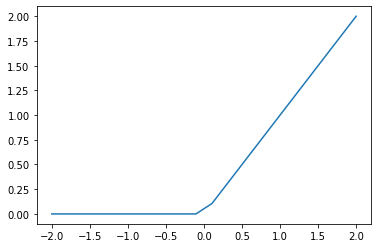

In [113]:
plot_function(F.relu)

In [114]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [115]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.333021,0.396112,0.512267,00:00
1,0.152461,0.235238,0.797350,00:00
2,0.083573,0.117471,0.911678,00:00
3,0.054309,0.078720,0.940628,00:00
4,0.040829,0.061228,0.956330,00:00
5,0.034006,0.051490,0.963690,00:00
6,0.030123,0.045381,0.966634,00:00
7,0.027619,0.041218,0.968106,00:00
8,0.025825,0.038200,0.969087,00:00
9,0.024441,0.035901,0.969578,00:00


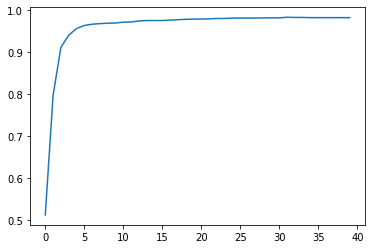

In [116]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [117]:
learn.recorder.values[-1][2]

0.98233562707901

In [118]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=True,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.114512,0.015580,0.995093,00:26


## **Further Research 1**

In [136]:
class Learner_1():
  def __init__(self, data, model, opt_func, loss_func, metrics):
    self.data_train = data[0]
    self.data_val = data[1]
    self.model = model
    self.opt_func = opt_func
    self.loss_func = loss_func
    self.metrics = metrics

  def fit(self, epochs):
    for i in range(epochs):
      self.train_epoch()
      print(self.validate_epoch(), end=' ')

  def cal_grad(self, x, y):
    loss_1 = self.loss_func
    x = x.view(-1, 28*28)
    preds = self.model(x.cuda())
    loss = loss_1(preds.cuda(), y.cuda())
    loss.backward()

  def train_epoch(self):
    for x, y in self.data_train:
      x = x.view(-1, 28*28)
      self.cal_grad(x.cuda(), y.cuda())
      self.opt.step()
      self.opt.zero_grad()


  def batch_accuracy(self, x, y):
    x = x.view(-1, 28*28)
    preds = x.sigmoid()
    correct = (preds>0.5) == y
    return correct.float().mean()


  def validate_epoch(self):
    accs = []
    for x, y in self.data_val:
      x = x.view(-1, 28*28)
      accs.append(self.metrics(self.model(x.cuda(), y.cuda())))
    
    # accs = [self.metrics(self.model(x.cuda(), y.cuda())) for x, y in self.data_val]
    return round(torch.stack(accs).mean().item(), 4)


In [137]:
learn = Learner_1(dls, resnet18, BasicOptim, mnist_loss, batch_accuracy)

In [138]:
learn.fit(10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "


RuntimeError: ignored

In [122]:
TensorImage.register_func(torch.nn.functional.smooth_l1_loss, TensorImage, TensorBBox)
TensorMultiCategory.register_func(TensorMultiCategory.mul, TensorMultiCategory, TensorImage)
TensorImage.register_func(torch.nn.functional.binary_cross_entropy_with_logits, TensorImage, TensorMultiCategory)

# **Further Research 2**

In [123]:
path = untar_data(URLs.MNIST)

In [124]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [125]:
(path/'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/2')]

In [140]:
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
zeros = (path/'training'/'0').ls().sorted()
ones

(#6742) [Path('/root/.fastai/data/mnist_png/training/1/10006.png'),Path('/root/.fastai/data/mnist_png/training/1/10007.png'),Path('/root/.fastai/data/mnist_png/training/1/1002.png'),Path('/root/.fastai/data/mnist_png/training/1/10020.png'),Path('/root/.fastai/data/mnist_png/training/1/10027.png'),Path('/root/.fastai/data/mnist_png/training/1/1003.png'),Path('/root/.fastai/data/mnist_png/training/1/10040.png'),Path('/root/.fastai/data/mnist_png/training/1/10048.png'),Path('/root/.fastai/data/mnist_png/training/1/10058.png'),Path('/root/.fastai/data/mnist_png/training/1/10067.png')...]

In [141]:
im1_path = ones[1]
im1 = Image.open(im1_path)
im1

In [142]:
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eights_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]
zero_tensors = [tensor(Image.open(o)) for o in zeros]
len(three_tensors), len(nine_tensors)

(6131, 5949)

torch.Size([28, 28])


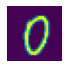

In [148]:
show_image(zero_tensors[1]);
print(zero_tensors[1].shape)

In [150]:
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eights_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255
stacked_zeros = torch.stack(zero_tensors).float()/255
stacked_zeros.shape

torch.Size([5923, 28, 28])

In [152]:
test_1_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'1').ls()])
valid_1_tens = test_1_tens.float()/255
test_2_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'2').ls()])
valid_2_tens = test_2_tens.float()/255
test_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
valid_3_tens = test_3_tens.float()/255
test_4_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'4').ls()])
valid_4_tens = test_4_tens.float()/255
test_5_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'5').ls()])
valid_5_tens = test_5_tens.float()/255
test_6_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'6').ls()])
valid_6_tens = test_6_tens.float()/255
test_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
valid_7_tens = test_7_tens.float()/255
test_8_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'8').ls()])
valid_8_tens = test_8_tens.float()/255
test_9_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'9').ls()])
valid_9_tens = test_9_tens.float()/255
test_0_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'0').ls()])
valid_0_tens = test_0_tens.float()/255








In [153]:
def mnist_distance(a, b):
  return (a-b).abs().mean((-1, -2))

In [154]:
train_x = torch.cat([stacked_ones, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixes, stacked_sevens, stacked_eights, stacked_nines, stacked_zeros]).view(-1, 28*28)

In [155]:
train_y = tensor([1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines) + [0]*len(zeros)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [156]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [158]:
valid_x = torch.cat([valid_1_tens, valid_2_tens, valid_3_tens, valid_4_tens, valid_5_tens, valid_6_tens, valid_7_tens, valid_8_tens, valid_9_tens, valid_0_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_1_tens) + [2]*len(valid_2_tens) + [3]*len(valid_3_tens) + [4]*len(valid_4_tens) + [5]*len(valid_5_tens) + [6]*len(valid_6_tens) + [7]*len(valid_7_tens) + [8]*len(valid_8_tens) + [9]*len(valid_9_tens) + [0]*len(valid_0_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))


In [159]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))

In [160]:
bias = init_params(1)

In [161]:
(train_x[0]*weights.T).sum() + bias

tensor([-1.0509], grad_fn=<AddBackward0>)

In [162]:
def linear1(xb): return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[ -1.0509],
        [-10.6975],
        [  6.4778],
        ...,
        [-25.5123],
        [ -6.5831],
        [ -3.0984]], grad_fn=<AddBackward0>)

In [170]:
def mnist_loss(predictions, targets):
  return tensor(targets-predictions).mean()

In [164]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [165]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [166]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [167]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [168]:
preds = linear1(batch)
preds

tensor([[ 0.7173],
        [-7.8474],
        [-1.3248],
        [-1.8167]], grad_fn=<AddBackward0>)

In [171]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(3.5679, grad_fn=<MeanBackward0>)

In [172]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0562), tensor([-1.]))

In [173]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()
  

In [175]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [176]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0562), tensor([-1.]))

In [177]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [200]:
def batch_accuracy(xb, yb):
  corrects = (xb-yb).sigmoid()
  return corrects.float().mean()

In [201]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1., grad_fn=<MeanBackward0>)

In [202]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

1.0

In [203]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

1.0

In [204]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

In [207]:
# dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(5, 0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.314388,0.509965,0.975466,00:17
1,0.333926,0.058148,0.994112,00:16
2,0.037962,0.005441,0.998037,00:16
3,0.011924,0.003390,0.998528,00:16
4,0.006146,0.005249,0.999019,00:16


In [210]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)